# Trabalhando com datasets desbalanceados
- Vamos começar usando uma [base simples para entender os conceitos](https://docs.google.com/spreadsheets/d/1QQe6UrNlzaym9YuDne7pfjs7QAVC9Fni/edit?usp=share_link&ouid=113635235784384787412&rtpof=true&sd=true)
- Para trabalhar com **datasets desbalanceados**, vamos usar a **biblioteca imbalanced-learn**:
    - https://imbalanced-learn.org/stable/index.html

In [1]:
# Importando a base
import pandas as pd
base = pd.read_excel('BaseInadimplencia.xlsx')

In [2]:
# Visualizando essa base
base.head(3)

SaldoConta  SaldoInvestimento  Situacao
0   -1.365390          -3.280278         0
1   -1.992492          -4.158429         0
2   -3.910816          -0.874096         0

In [3]:
# Contando a quantidade de valores
base.Situacao.value_counts()

0    150
1     15
Name: Situacao, dtype: int64

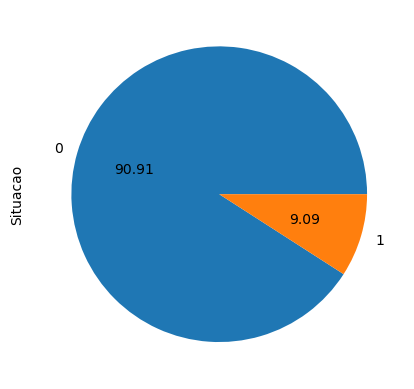

In [4]:
# Visualizando os dados graficamente
base.Situacao.value_counts().plot.pie(autopct='%.2f');

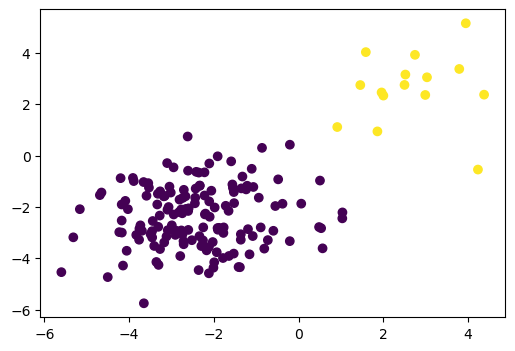

In [5]:
# Visualizando a distribuição dos dados
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)

plt.show()

### Como podemos resolver esse problema?
- Temos 2 classes:
    - Classe **majoritária**: a que possui **mais** registros
    - Classe **minoritária**: a que possui **menos** registros

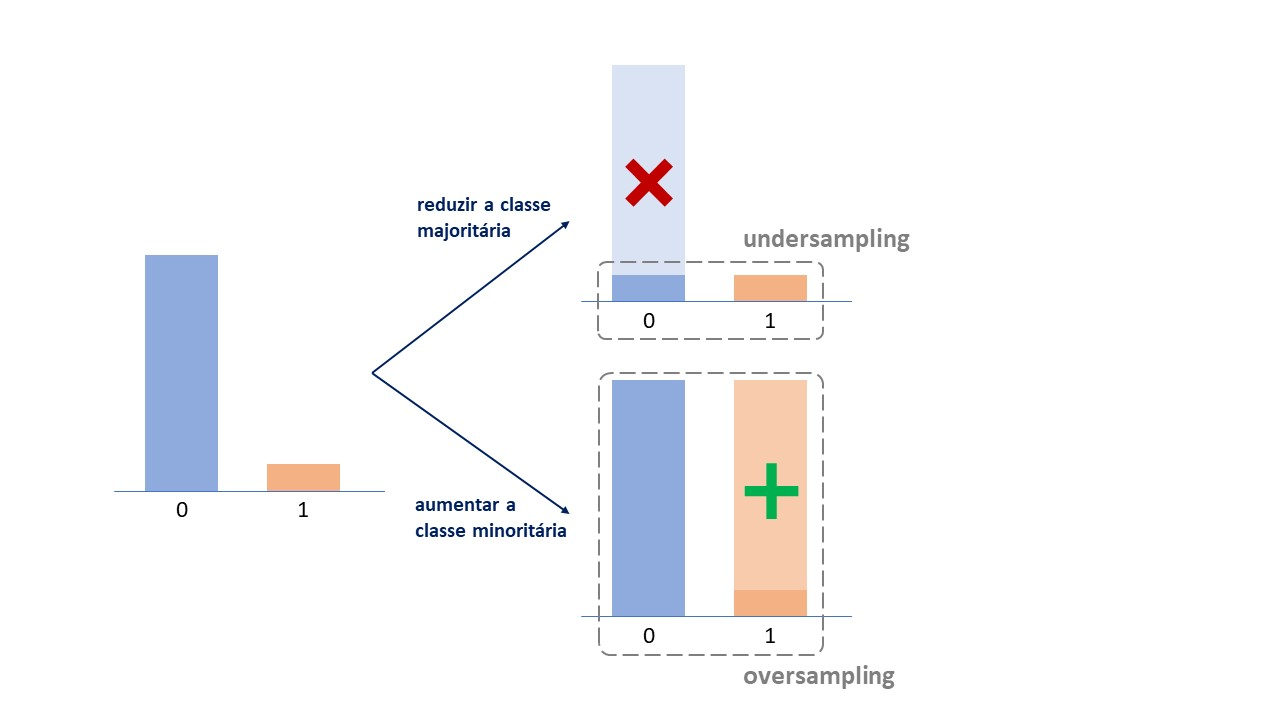

In [7]:
# Instalando a biblioteca
# !pip install -U imbalanced-learn

### Reduzindo os registros da classe majoritária
- Vamos **retirar dados da classe que possui mais registros**
    - Precisamos ter cuidado para que essa retirada não acabe causando **perda de  informação** (retirando informações que são muito importantes)
    - Também é necessário verificar o tamanho da base restante
- Podemos começar fazendo isso excluindo registros de forma aleatória com o **[RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler)**

In [8]:
# Separando X e y
X = base.drop('Situacao',axis=1)
y = base.Situacao

In [10]:
# Definindo o RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [11]:
# Definindo a nova amostra
X_res, y_res = rus.fit_resample(X, y)

In [13]:
# Contando os valores
y_res.value_counts()

0    15
1    15
Name: Situacao, dtype: int64

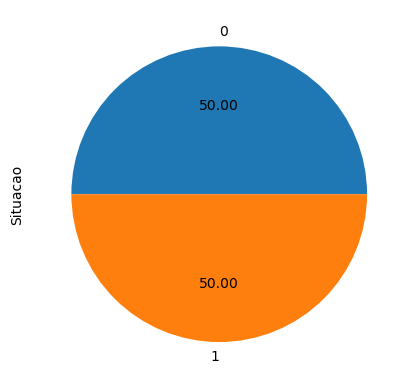

In [17]:
# E visualizando graficamente
y_res.value_counts().plot.pie(autopct='%.2f');

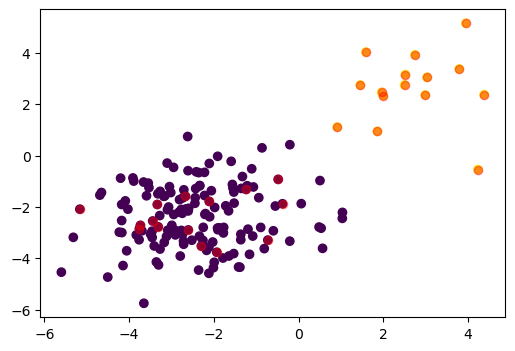

In [21]:
# Visualizando a distribuição dos dados
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',alpha=0.4)

plt.show()

- Podemos também **substituir um conjunto de amostras (um cluster) pelo seu centróide** utilizando o **[ClusterCentroids](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html#imblearn.under_sampling.ClusterCentroids)**

In [23]:
# Importando
from imblearn.under_sampling import ClusterCentroids

In [24]:
# Definindo o ClusterCentroids
cc = ClusterCentroids(random_state=42)

In [25]:
# Criando a amostra dos dados
X_res, y_res = cc.fit_resample(X, y)

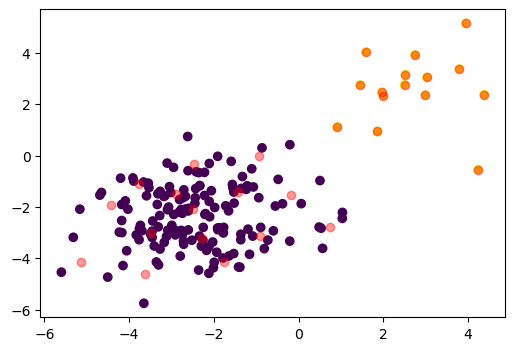

In [26]:
# Visualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',alpha=0.4)

plt.show()

- Ou utilizar o **[NearMiss](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html#imblearn.under_sampling.NearMiss)** para manter apenas os pontos com **menor distância aos pontos da classe minoritária**
    - Nesse caso, vai retirar os pontos mas continuar mantendo a **região de separação entre as classes**

In [27]:
# Fazendo a reamostragem usando o NearMiss
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)

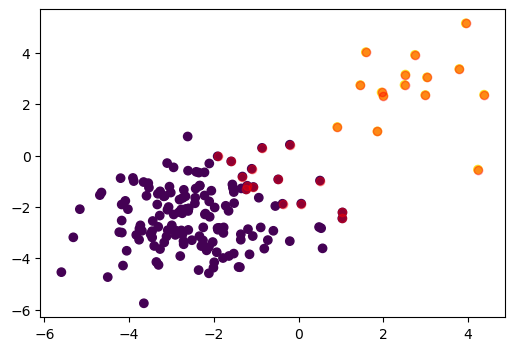

In [28]:
# Visualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',alpha=0.4)

plt.show()

- Existem várias outras formas de fazermos o **undersampling** e todas elas são explicadas na própria **documentação**:
    - https://imbalanced-learn.org/stable/under_sampling.html#

### Aumentando os registros da classe minoritária
- Podemos **gerar novos valores** baseado nos atuais registros da base de dados, seja apenas **duplicando os valores** ou utilizando outros métodos (como o KNN) para **criar novos pontos**
    - Precisamos **garantir que não vamos ter overfitting** por mostrar ao modelo várias vezes dados semelhantes
- Podemos começar gerando os registros também de forma aleatória com o **[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler)**

In [30]:
# Importando
from imblearn.over_sampling import RandomOverSampler

In [31]:
# Definindo o RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [32]:
# Refazendo nossa amostra
X_res, y_res = ros.fit_resample(X, y)

In [33]:
# Contando os valores
y_res.value_counts()

0    150
1    150
Name: Situacao, dtype: int64

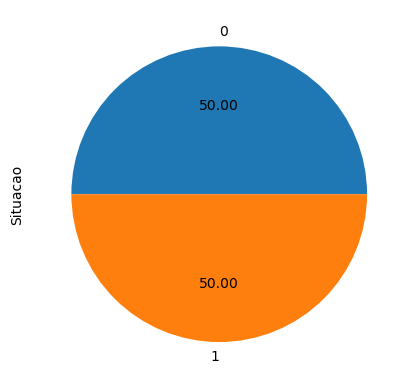

In [34]:
# E visualizando graficamente
y_res.value_counts().plot.pie(autopct='%.2f');

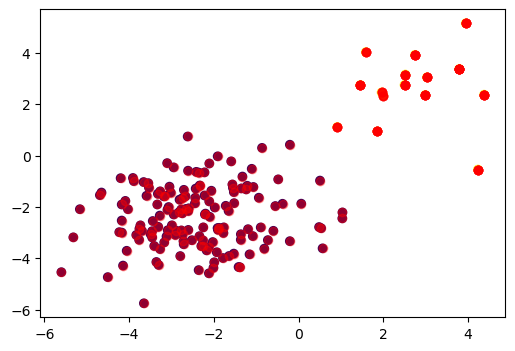

In [35]:
# Vsualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',alpha=0.4)

plt.show()

**Se a repetição dos dados for um problema, podemos utilizar o parâmetro `shrinkage`**
- Quando o parâmetro for passado, ele vai gerar uma "suavização" nos dados

In [47]:
# Definindo o ros
ros = RandomOverSampler(random_state=42,shrinkage=0.5)

In [48]:
# Refazendo nossa amostra
X_res, y_res = ros.fit_resample(X, y)

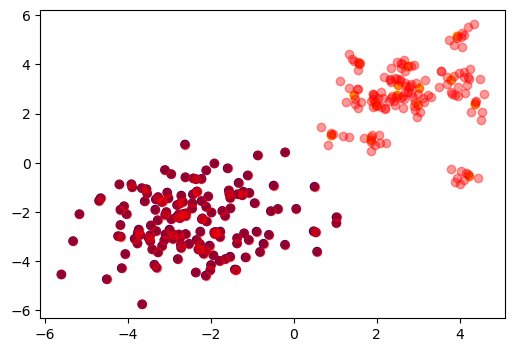

In [49]:
# Vsualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',alpha=0.4)

plt.show()

- Outra opção é utilizarmos o SMOTE ou ADASYN, que vai **utilizar o KNN** para gerar novos registros em uma **distância aleatória** entre o **ponto de dado e um dos seus K vizinhos mais próximos**
    - Enquanto o [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE) vai considerar todos os pontos sem distinção, o [ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html#imblearn.over_sampling.ADASYN) vai **gerar mais observações para aqueles pontos da classe minoritária que tiverem mais observações da classe majoritária na região dos vizinhos mais próximos**

In [51]:
# Utilizando o SMOTE
from imblearn.over_sampling import SMOTE
s = SMOTE(random_state=42)
X_res, y_res = s.fit_resample(X, y)

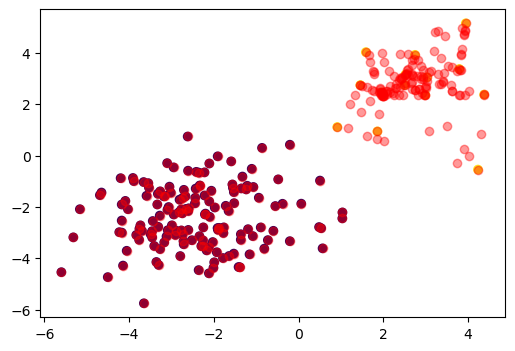

In [52]:
# Vsualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',alpha=0.4)

plt.show()

In [53]:
# Utilizando ADASYN
from imblearn.over_sampling import ADASYN
a = ADASYN(random_state=42)
X_res, y_res = a.fit_resample(X, y)

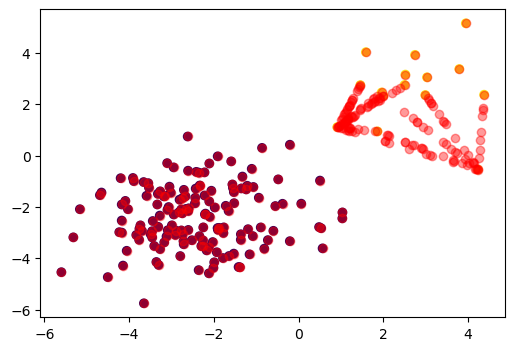

In [54]:
# Vsualizando graficamente
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(base.SaldoConta, base.SaldoInvestimento, c=base.Situacao)
ax.scatter(X_res.SaldoConta, X_res.SaldoInvestimento, c='red',alpha=0.4)

plt.show()

- Existem várias outras formas de fazermos o **oversampling** e todas elas são explicadas na própria **documentação**:
    - https://imbalanced-learn.org/stable/over_sampling.html

- **Próximos passos:**
    - Como sugestão, você pode utilizar essa **base real de [dados de cartão de crédito do Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)** para aplicar essas técnicas